In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit

clight=constants.speed_of_light
gamma0=190.99019102

class Ion:
    def __init__(self, name, A, Z, q0, excited_lifetime, hw0):
        m_u = 931.49410242e6  # eV/c^2 -- atomic mass unit
        m_e = 0.511e6  # eV/c^2 -- electron mass
        m_p = 938.272088e6  # eV/c^2 -- proton mass

        self.name = name
        self.A = A
        self.Z = Z
        self.q0 = q0  # e
        self.excited_lifetime = excited_lifetime  # s
        self.hw0 = hw0  # eV

        self.ne = Z - q0
        self.mass0 = self.A * m_u + self.ne * m_e  # eV/c^2

        N_pb = int(1.9 * 1e8)  # ion-bunch intensity for lead
        self.N_a = int(N_pb * (self.Z / 82) ** -1.9)  # ion-bunch intensity for arbitrary ion with charge Z
        self.Intensity = self.N_a


calcium = Ion(name="calcium", A=40, Z=20, q0=17, excited_lifetime=0.4279 * 1e-12, hw0=661.89)
xenon = Ion(name="xenon", A=129, Z=54, q0=39, excited_lifetime=3 * 1e-12, hw0=492.22)
lead = Ion(name="lead", A=208, Z=82, q0=79, excited_lifetime=76.6e-12, hw0=230.823)

ions=[lead,xenon,calcium]

Transverse cooling for all ions

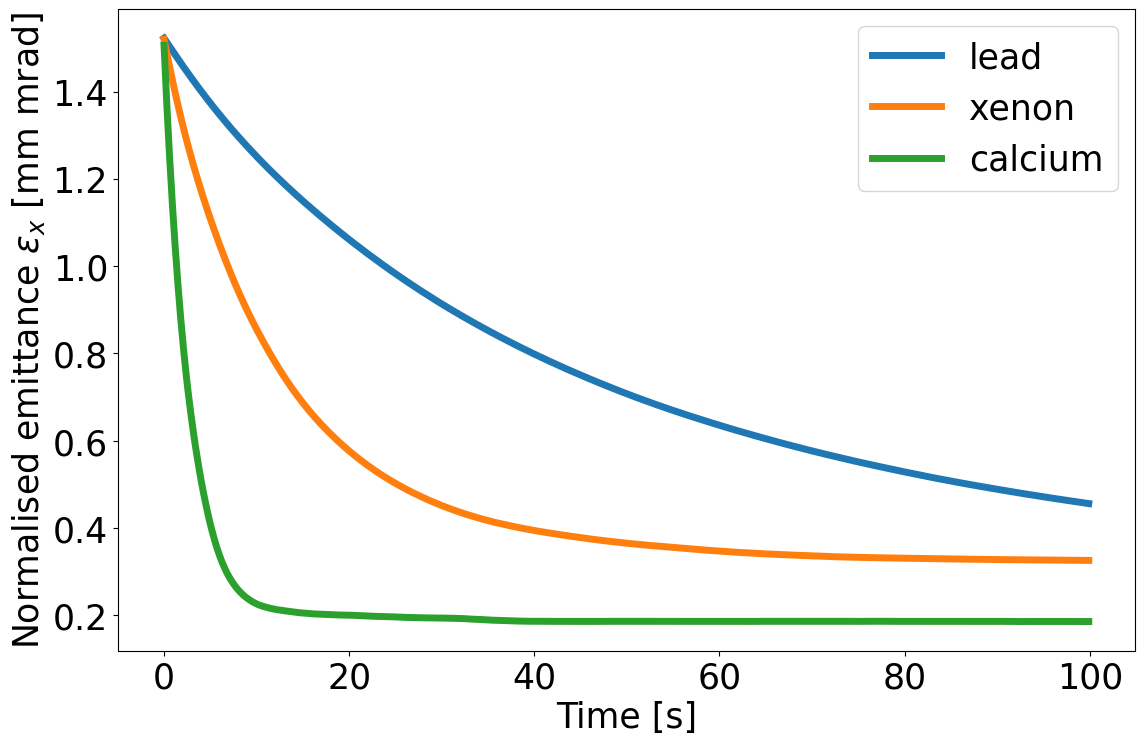

In [19]:
growth_rate_list=[]
ion_names=[ion.name for ion in ions]
ion_energy=[ion.hw0 for ion in ions]




plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion in ions:
    loaded_data = np.load(f'results/{ion.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']*1e3
    time=loaded_data['time']
    s_per_turn=loaded_data['s_per_turn']
    px=loaded_data['px']
    action_x=loaded_data['action_x']
    action_y=loaded_data['action_y']
    emittance_x=loaded_data['emittance_x']

     # Define the exponential function
    def exponential_func(x, a, b):
        return emittance_x[0] * np.exp(x * b)

    # Fit the data to the exponential function
    params, covariance = curve_fit(exponential_func, time, emittance_x)

    # Extract the parameters
    a, b = params
    growth_rate_list.append(b)

    plt.plot(time,emittance_x*1e6, label=f'{ion.name}', linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
plt.legend()
plt.tight_layout()
plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


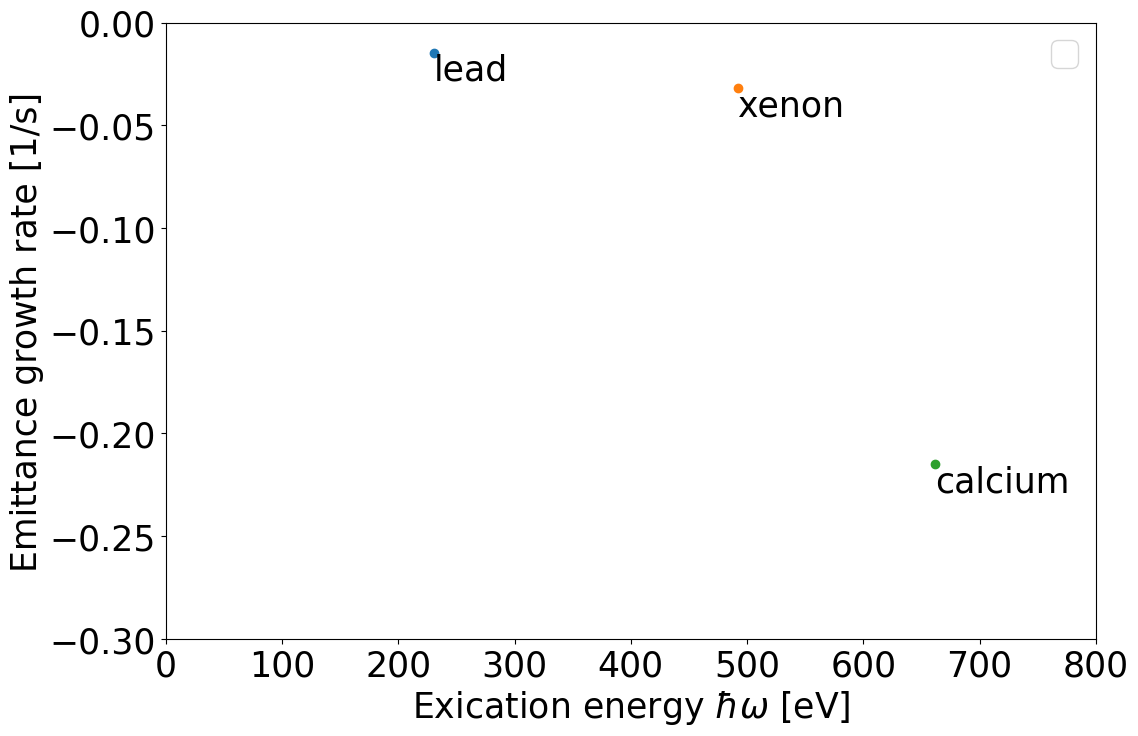

In [20]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
for i in range(len(ions)):
    plt.scatter(ion_energy[i],growth_rate_list[i])
    plt.text(ion_energy[i],growth_rate_list[i], f'{ion_names[i]}', fontsize=25, ha='left', va='top')
plt.ylim([-0.30,0]) 
plt.xlim([0,800])    
plt.xlabel(r'Exication energy $\hbar \omega$ [eV]')
plt.ylabel(r'Emittance growth rate [1/s]')
plt.legend()
plt.show()


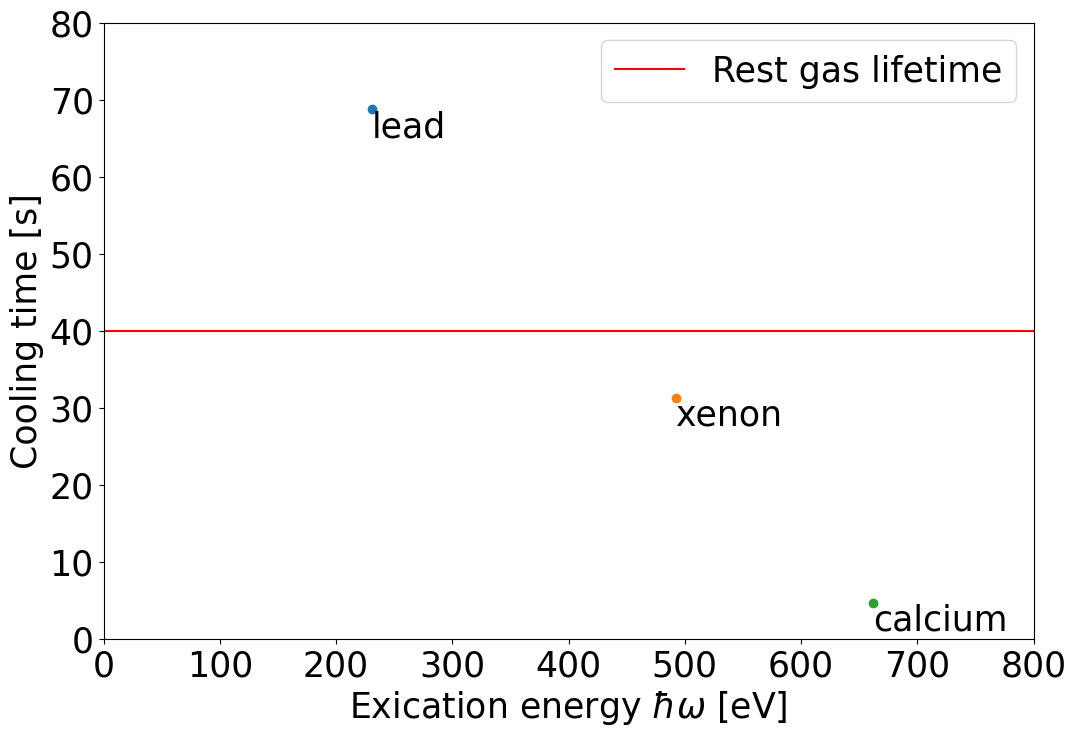

In [26]:
lifetime_list = [-1 / growth_rate for growth_rate in growth_rate_list]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
for i in range(len(ions)):
    plt.scatter(ion_energy[i],lifetime_list[i])
    plt.text(ion_energy[i],lifetime_list[i], f'{ion_names[i]}', fontsize=25, ha='left', va='top')
plt.ylim([0,80]) 
plt.xlim([0,800])    
plt.axhline(40,label='Rest gas lifetime',color='red')
plt.xlabel(r'Exication energy $\hbar \omega$ [eV]')
plt.ylabel(r'Cooling time [s]')
plt.legend()
plt.show()

optimal laser position

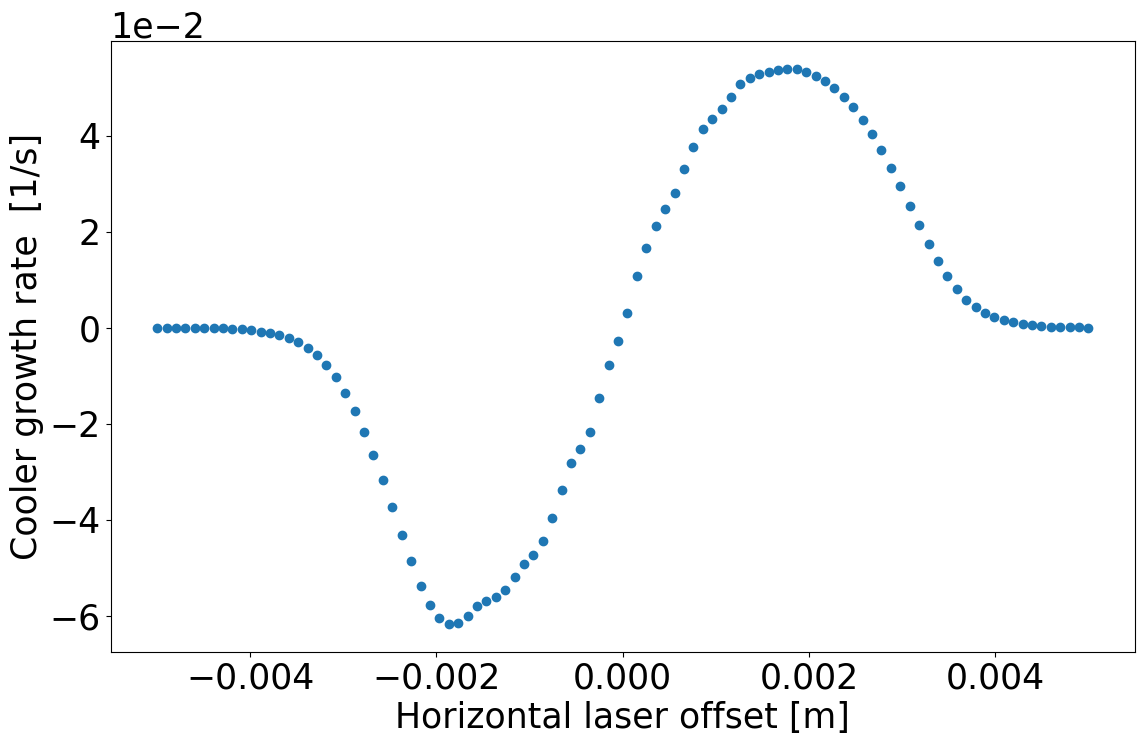

In [25]:
# Load the data from the .npz file
data = np.load('results/Optimal_laser_x_xenon.npz')  # Replace 'ion_name' with the appropriate value

# Access the variables stored in the file
cooler_growth_rates_list = data['cooler_growth_rates_list']
final_emittance_list = data['final_emittance_list']
laser_x_list = data['laser_x_list']
nemitt = data['nemitt']
time = data['time']

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(laser_x_list,cooler_growth_rates_list)
plt.xlabel('Horizontal laser offset [m]')
plt.ylabel('Cooler growth rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.savefig('Optimal_laser_x.png', dpi=300)
plt.show()

In [ ]:
loaded_data = np.load('results/xenon.npz')

delta    = loaded_data['delta']
zeta    = loaded_data['zeta']
state = loaded_data['state']
x = loaded_data['x']*1e3
time=loaded_data['time']
s_per_turn=loaded_data['s_per_turn']
px=loaded_data['px']
action_x=loaded_data['action_x']
action_y=loaded_data['action_y']
emittance_x=loaded_data['emittance_x']

excited=state==2
delta_std = np.std(delta, axis=1)

exc0=excited[1,:]

fraction_excited=sum(exc0)/len(exc0)*100

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))


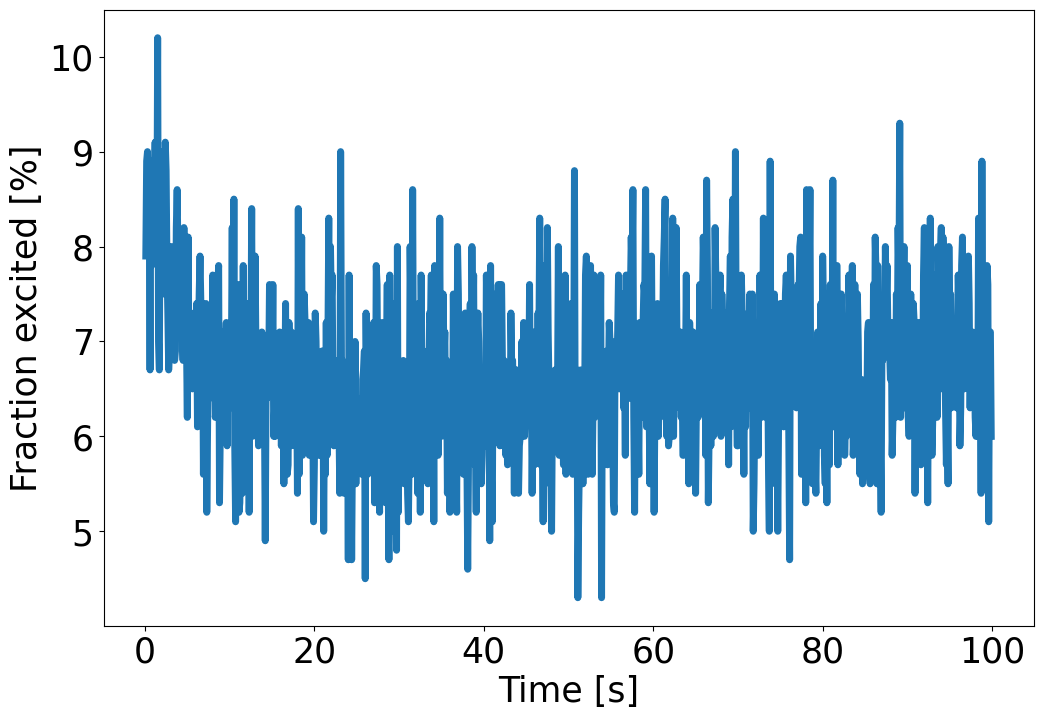

In [ ]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time[1:],fraction_excited[1:], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
plt.show()

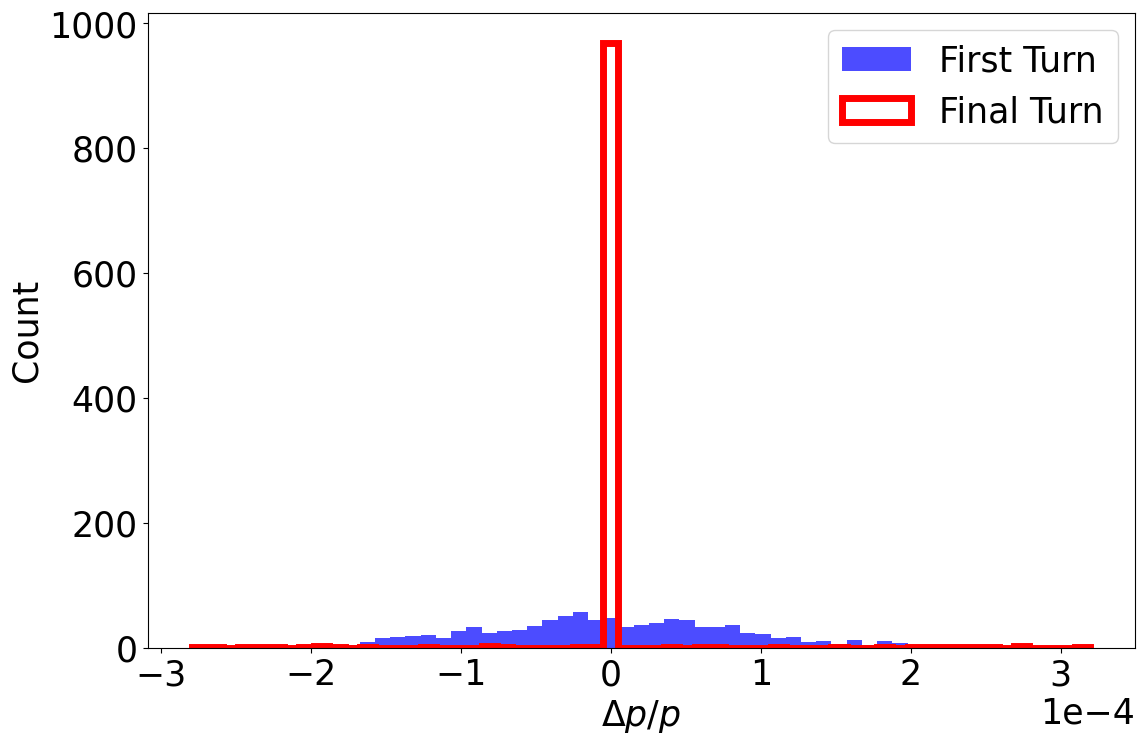

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot histograms for delta at the first and final turns
min_delta=min(delta_final_turn)
max_delta=max(delta_final_turn)
bins=np.linspace(min_delta, max_delta,60)
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


PX

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Extract delta at the first turn (assuming the first turn is at index 0)
# px_first_turn = px[0, :]

# # Extract px at the final turn
# px_final_turn = px[-1, :]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# # Plot histograms for px at the first and final turns
# min_px=min(px_final_turn)
# max_px=max(px_final_turn)
# bins=np.linspace(min_delta, max_px,60)
# # plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# # plt.hist(px_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
# plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
# plt.hist(px_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
# plt.xlabel('px')
# plt.ylabel('Count')
# plt.legend()
# plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# #plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
# plt.show()


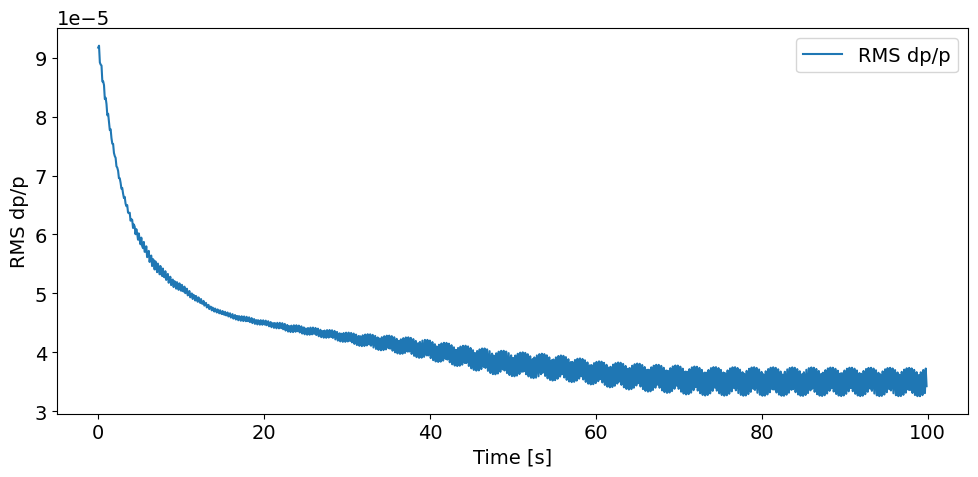

In [ ]:
sigma_dp = np.std(delta[0, :])
# plot some overall values
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, np.std(delta, axis=1), label=f'RMS dp/p')
# plt.plot(time, np.mean(action_x, axis=1), label=f'RMS $\epsilon_x$')
# plt.plot(time, np.mean(action_y, axis=1), label=f'RMS $\epsilon_y$')
plt.xlabel('Time [s]')
plt.ylabel('RMS dp/p')
plt.legend()
plt.tight_layout()
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

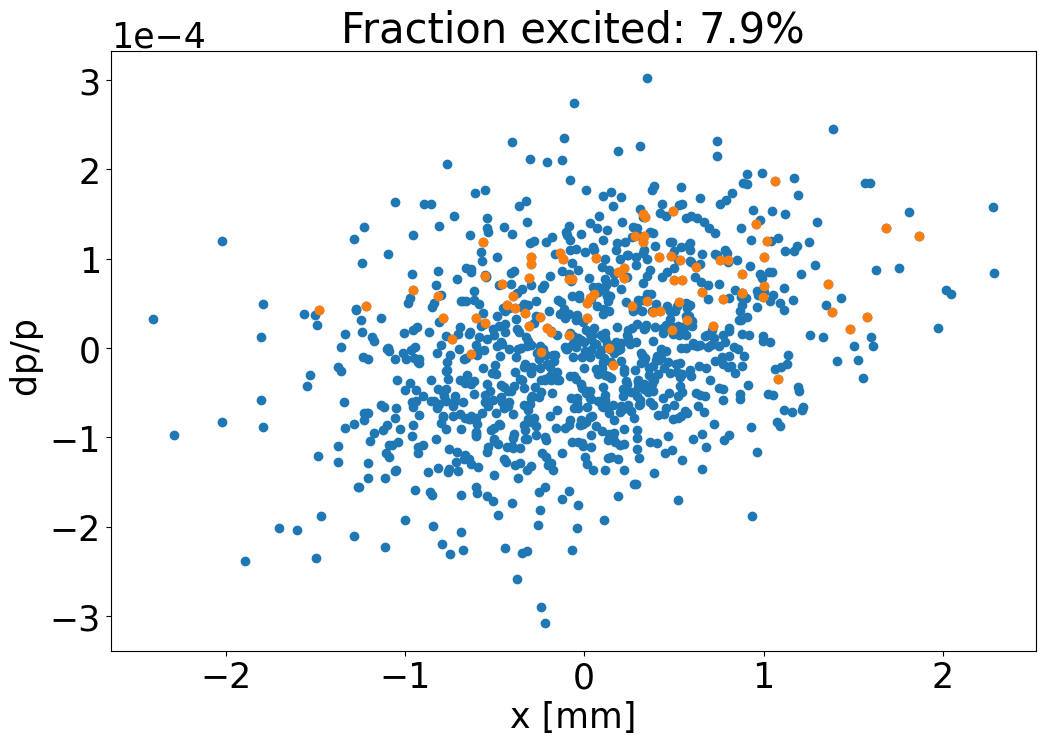

In [ ]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

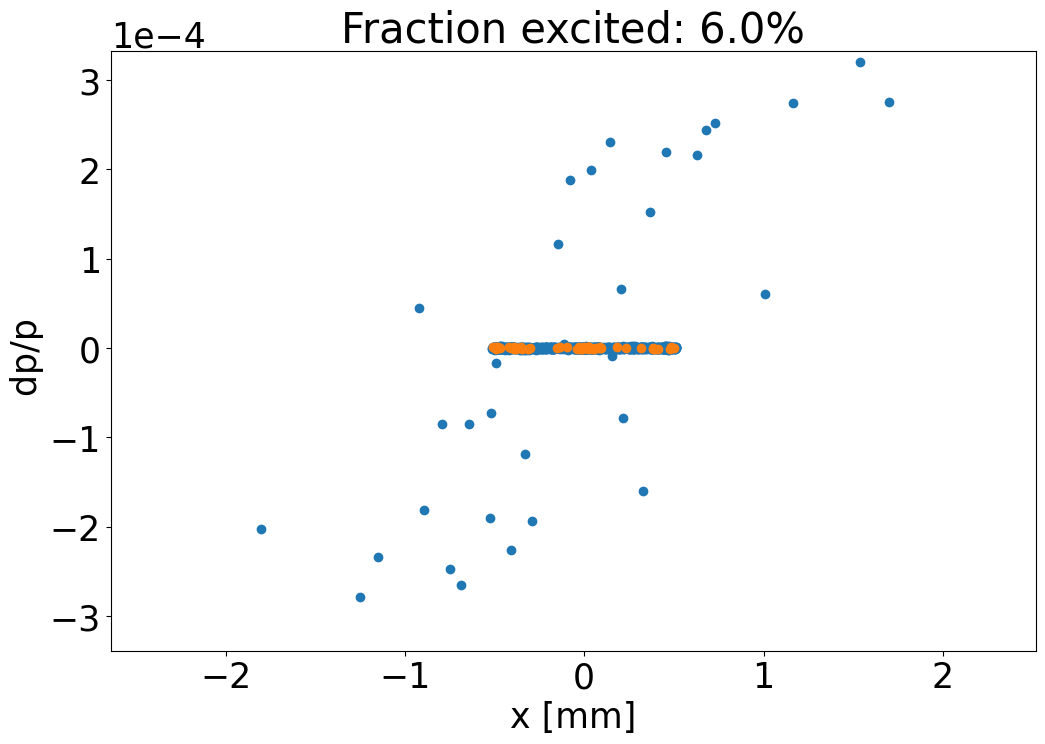

In [ ]:
turn=-1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

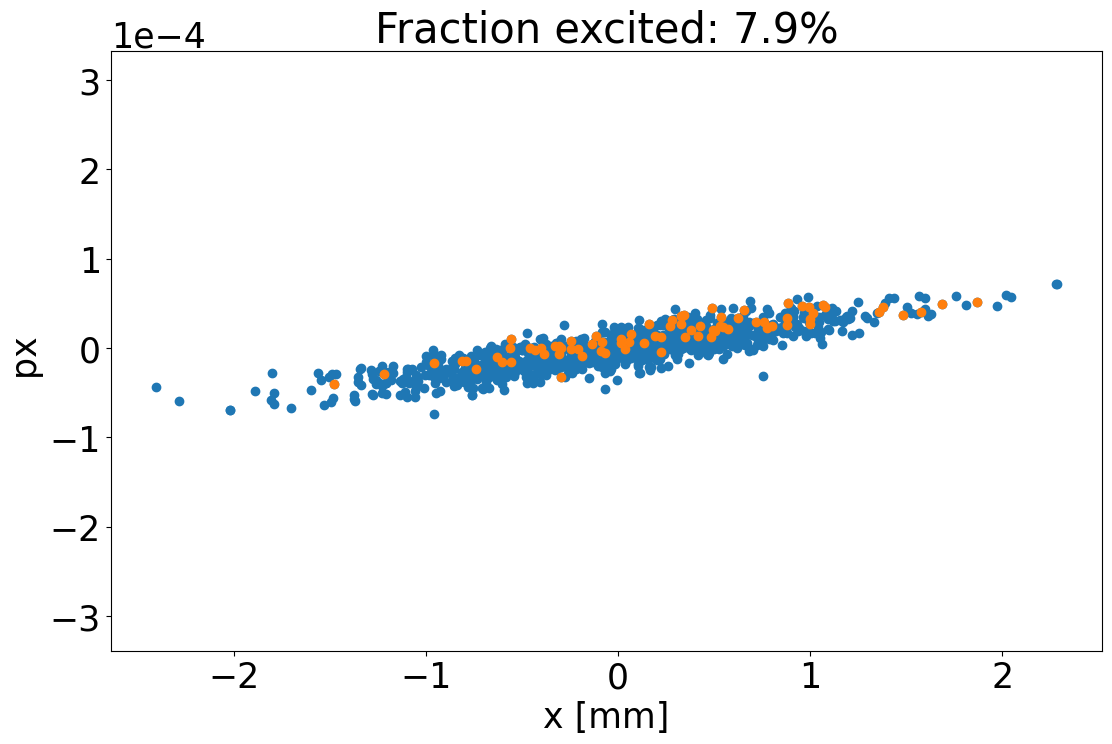

In [ ]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],px[turn])
plt.scatter(x[turn][excited0],px[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('px ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

Zeta

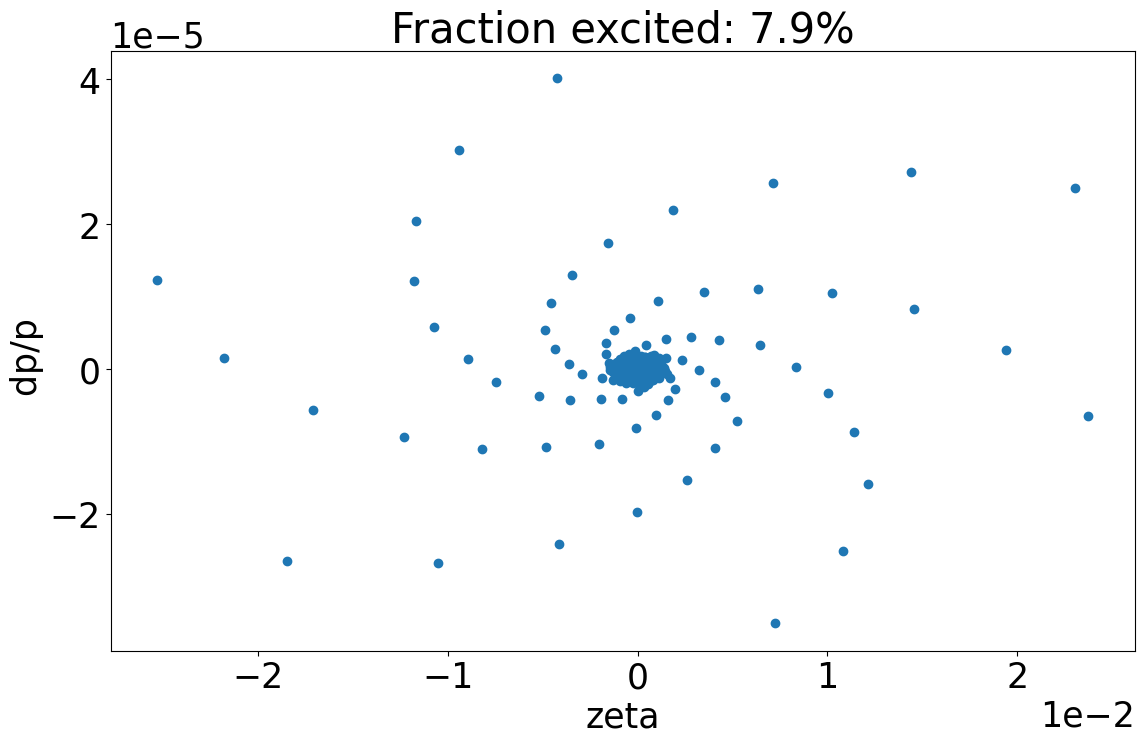

In [ ]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

plt.scatter(zeta[:,0],delta[:,0]) #turns,particles
plt.xlabel('zeta')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

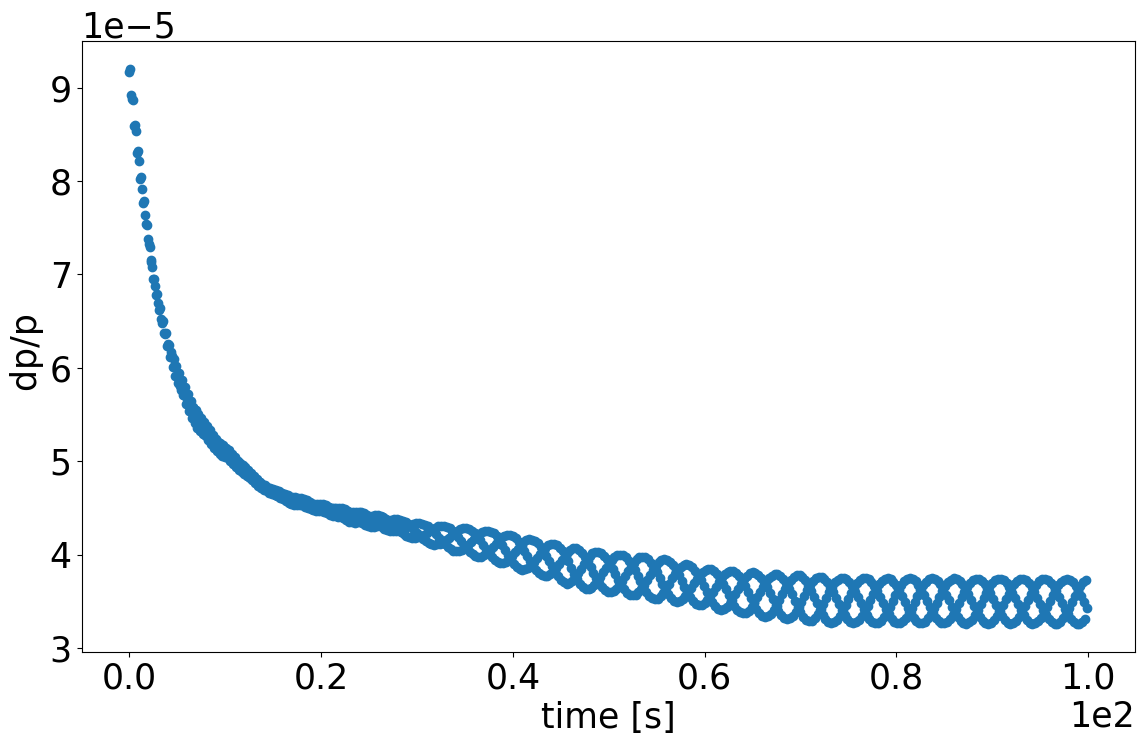

In [ ]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(time,np.std(delta,axis=1)) #turns,particles
plt.xlabel('time [s]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()